In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv('bestsellers with categories.csv',  on_bad_lines='skip')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [118]:
#Відповідь: Про скільки книг зберігає дані датасет?
print('рядків:', df.shape[0], '\n')
print('унікальні книги', len(df['Name'].unique()))

рядків: 550 

унікальні книги 351


In [119]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head(5)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [120]:
df.isnull().sum() / len(df)

#Відповідь: Чи є в якихось змінних пропуски? (Так / ні) = Ні

name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64

In [121]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
print(df['genre'].unique())

['Non Fiction' 'Fiction']


<Axes: title={'center': 'Ціни'}, ylabel='Frequency'>

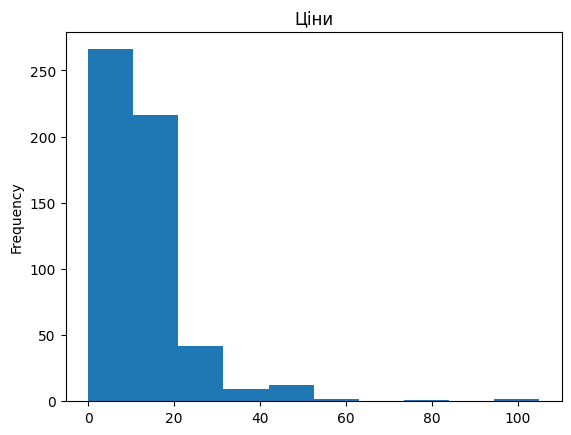

In [122]:
df['price'].plot(kind='hist', title='Ціни',)

In [123]:
print(df['price'].describe())

#Відповідь: Максимальна ціна? - 105
#Відповідь: Мінімальна ціна?  - 0
#Відповідь: Середня ціна?     - 13.1
#Відповідь: Медіанна ціна?    - 11

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64


In [124]:
#Відповідь: Який рейтинг у датасеті найвищий?
print(df['user_rating'].max())

4.9


In [125]:
#Відповідь: Скільки книг мають такий рейтинг?
df[df['user_rating'] == df['user_rating'].max()]['name'].count()

52

In [126]:
#Відповідь: Яка книга має найбільше відгуків?
df[df['reviews'] == df['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [127]:
#Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
book_2015 = df[df['year'] == 2015]
book_2015['price'].max()
book_2015[book_2015['price'] == book_2015['price'].max()]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [128]:
#Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
len(df[(df['genre'] == 'Fiction') & (df['year'] == 2010)])

20

In [129]:
#Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
len(df[(df['user_rating'] == df['user_rating'].max()) & ((df['year'] == 2010) | (df['year'] == 2011))])

1

In [130]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
data = df[(df['year'] == 2015) & (df['price'] <= 8)]
data.sort_values(by='price', inplace=True)
data

<ipython-input-130-4bfeac88902c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by='price', inplace=True)


,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction


<Axes: xlabel='user_rating', ylabel='reviews'>

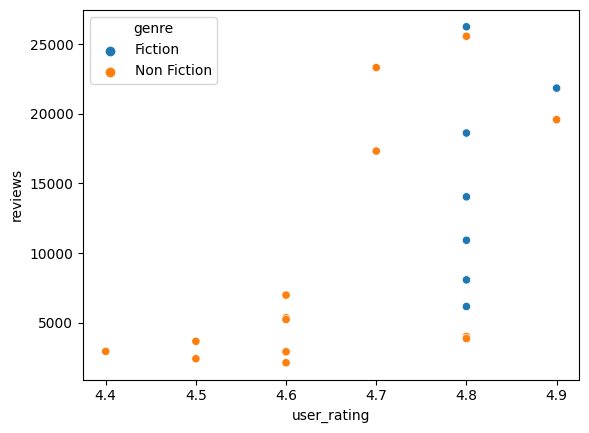

In [147]:
sns.scatterplot(data=data, x="user_rating", y="reviews", hue="genre")

In [131]:
#Відповідь: Яка книга остання у відсортованому списку? Відповідь:
data.tail(1)

,name,author,user_rating,reviews,price,year,genre
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction


In [132]:
#Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку 
#мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
df.groupby('genre')['price'].agg(['min', 'max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [133]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів 
#(використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
authors = df.groupby(['author'])[['name']].agg(['count'])
authors = authors.sort_values(by='author')
authors


,name
,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2


In [134]:
#Відповідь: Якої розмірності вийшла таблиця? Відповідь:
authors.shape

(248, 1)

In [135]:
#Відповідь: Який автор має найбільше книг? Відповідь:
max_books = authors.max()
print(authors[authors[('name', 'count')] == max_books[('name', 'count')]])

             name
            count
author           
Jeff Kinney    12


In [136]:
#Відповідь: Скільки книг цього автора? Відповідь: - 12

In [137]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора 
#використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
author_rating =  df.groupby(['author'])[['user_rating']].agg(['mean'])
author_rating

,user_rating
,mean
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000


<BarContainer object of 15 artists>

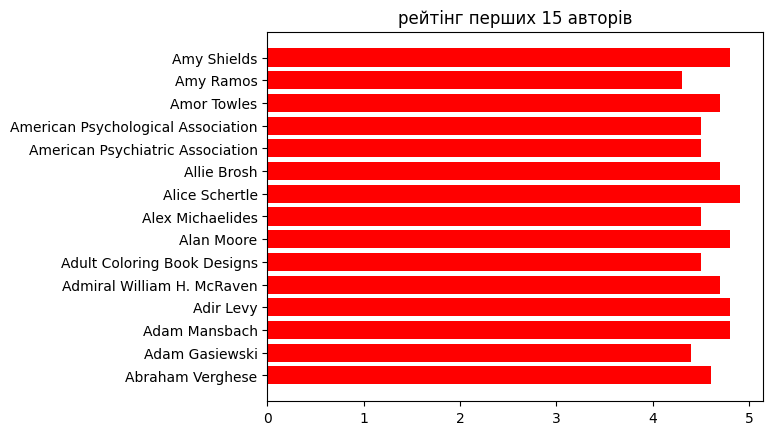

In [138]:
x = author_rating.head(15)['user_rating'].index.tolist()
y = author_rating.head(15)['user_rating']['mean'].values.tolist()

fig, ax = plt.subplots()
ax.set_title("рейтінг перших 15 авторів")
ax.barh(x, y, color="red", label="рейтинг перших 15 авторів")

In [139]:
#У якого автора середній рейтинг мінімальний? Відповідь:
min_rating = author_rating['user_rating'].min()
print(author_rating[author_rating[('user_rating', 'mean')] == min_rating[0]])

            user_rating
                   mean
author                 
Donna Tartt         3.9


In [140]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг 
#(Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
df = pd.concat([authors[('name')], author_rating[('user_rating', 'mean')]], axis=1)
print(df)


                            count  (user_rating, mean)
author                                                
Abraham Verghese                2             4.600000
Adam Gasiewski                  1             4.400000
Adam Mansbach                   1             4.800000
Adir Levy                       1             4.800000
Admiral William H. McRaven      1             4.700000
...                           ...                  ...
Walter Isaacson                 3             4.566667
William Davis                   2             4.400000
William P. Young                2             4.600000
Wizards RPG Team                3             4.800000
Zhi Gang Sha                    2             4.600000

[248 rows x 2 columns]


In [141]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
df.sort_values(by=[('user_rating', 'mean'), ('count')], inplace=True)
df

,count,"(user_rating, mean)"
author,,
Donna Tartt,2,3.9
Muriel Barbery,1,4.0
Gillian Flynn,3,4.0
Gallup,9,4.0
Chris Cleave,1,4.1
...,...,...
Sherri Duskey Rinker,2,4.9
Emily Winfield Martin,4,4.9
Sarah Young,6,4.9


In [142]:
#Відповідь: Який автор перший у списку?
df.head(1)

,count,"(user_rating, mean)"
author,,
Donna Tartt,2,3.9
